## Exercise 16: Implement a basic oracle to mark a specific state
1. Implement an oracle in Qiskit that marks a specific state, say |x = 101⟩, as the solution in a 3-qubit system.
2. Implement Grover’s Search Algorithm using your oracle and measure the correct result.

Expected Outcome: The correct state |101⟩ will have the highest probability of being measured.

[Hints:] The oracle can flip the sign of the marked state’s amplitude. Use multi-controlled NOT gates (CCX) to achieve this. After implementing the oracle, use diffusion operators to amplify the marked state.

In [142]:
from qiskit import *
from qiskit.primitives import StatevectorSampler  
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector
from numpy import sqrt
import numpy as np
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from qiskit_aer import AerSimulator
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

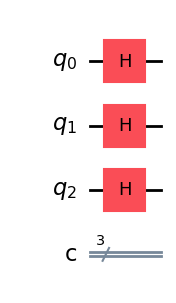

In [180]:
qc = QuantumCircuit(3, 3) 
    
qc.h(range(3))

qc.draw('mpl')

Initial State Vector (in LaTeX notation): 


<IPython.core.display.Latex object>


Initial State Vector (on Q-sphere Sphere):


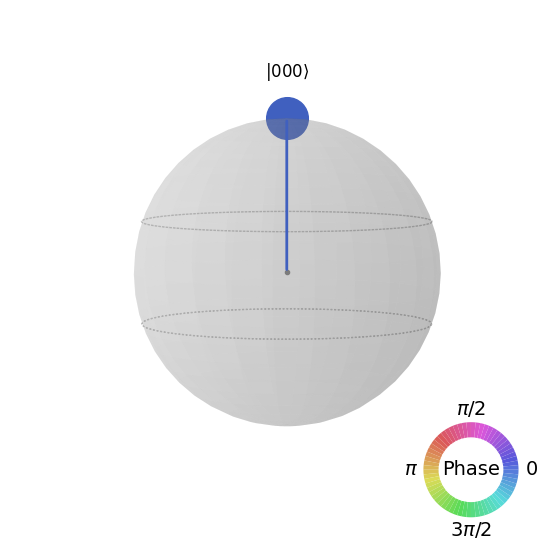


Initial State Vector (on Bloch Sphere):  


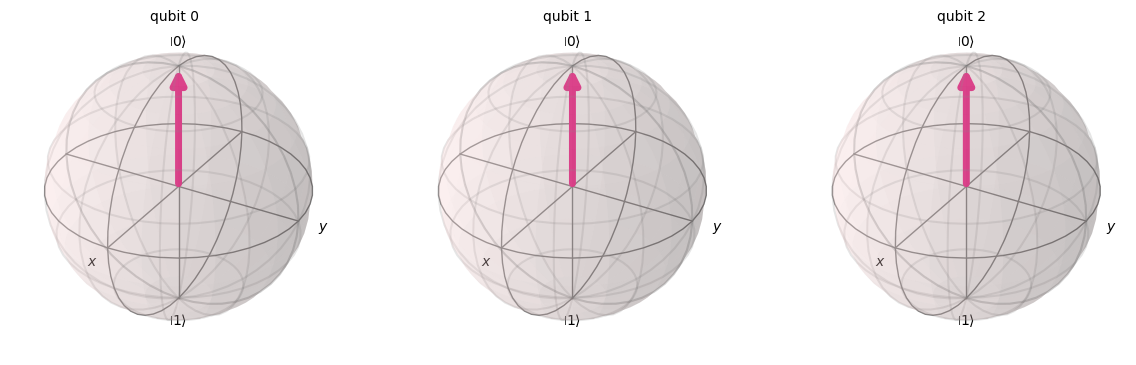

In [181]:
u_init = Statevector.from_label('000')
print("\033[1mInitial State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_init.draw('latex'))

print("\n\033[1mInitial State Vector (on Q-sphere Sphere):\033[0m".ljust(50))
display(u_init.draw('qsphere'))

print("\n\033[1mInitial State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_init.draw('bloch'))


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


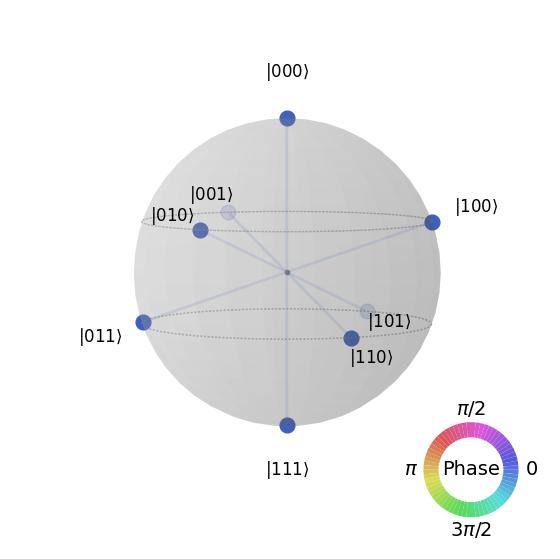


Resulting State Vector (on Bloch Sphere):


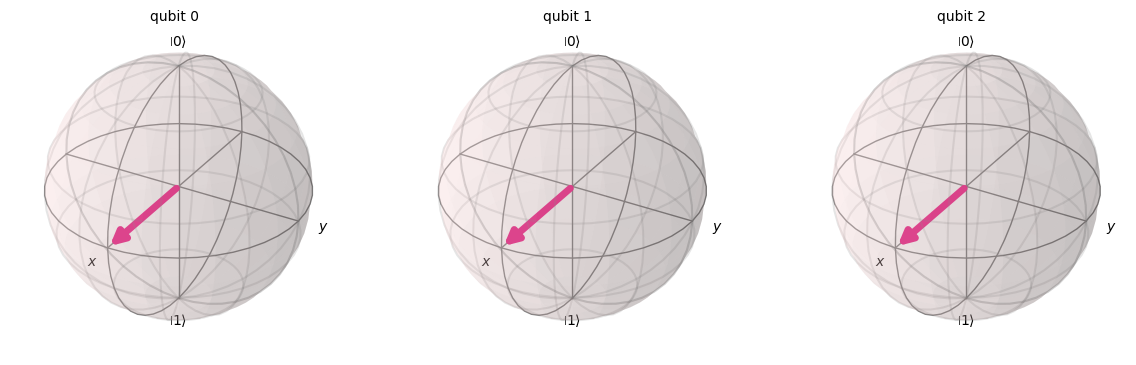

In [182]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

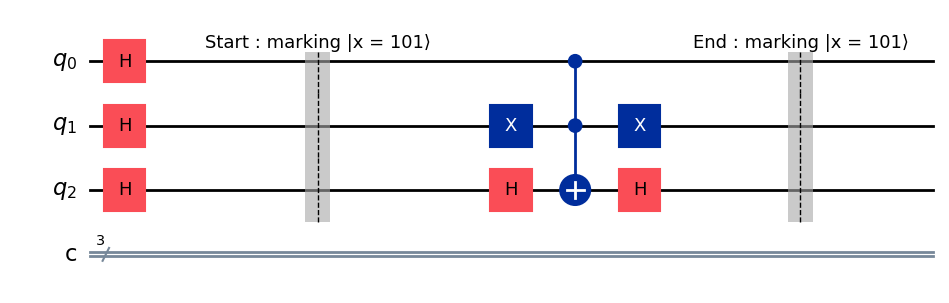

In [183]:
qc.barrier(label="Start : marking |x = 101⟩")  # Label for the Oracle part
qc.x(1)  

qc.h(2)
qc.ccx(0, 1, 2)  
qc.h(2)

qc.x(1)
qc.barrier(label="End : marking |x = 101⟩")  # Label for end of Oracle
qc.draw('mpl')


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


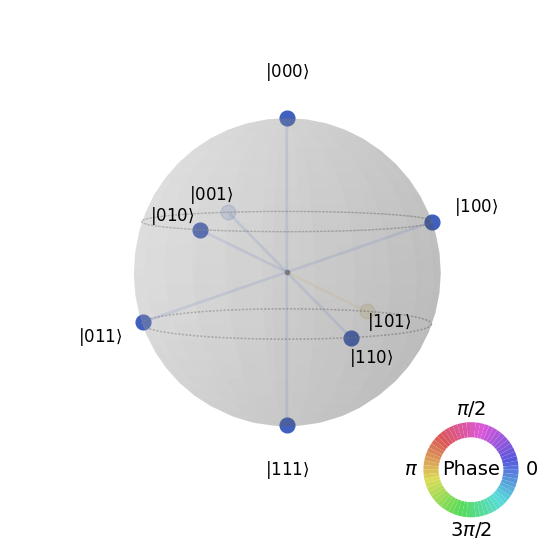


Resulting State Vector (on Bloch Sphere):


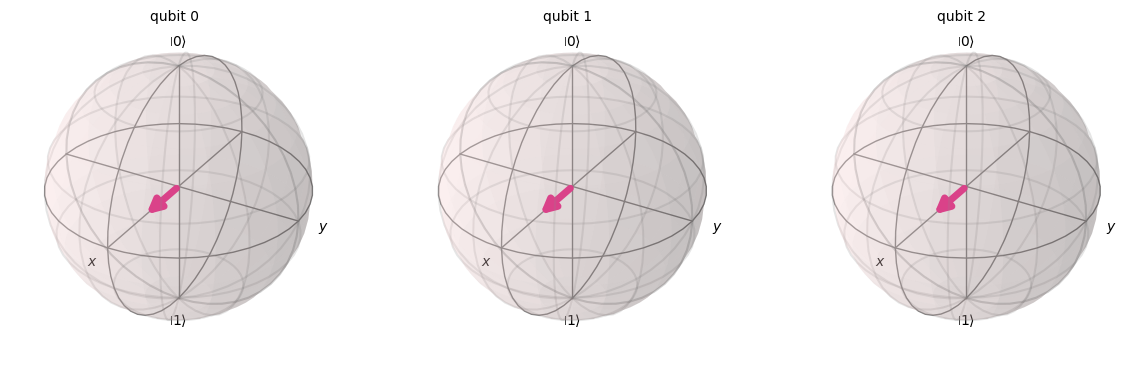

In [184]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

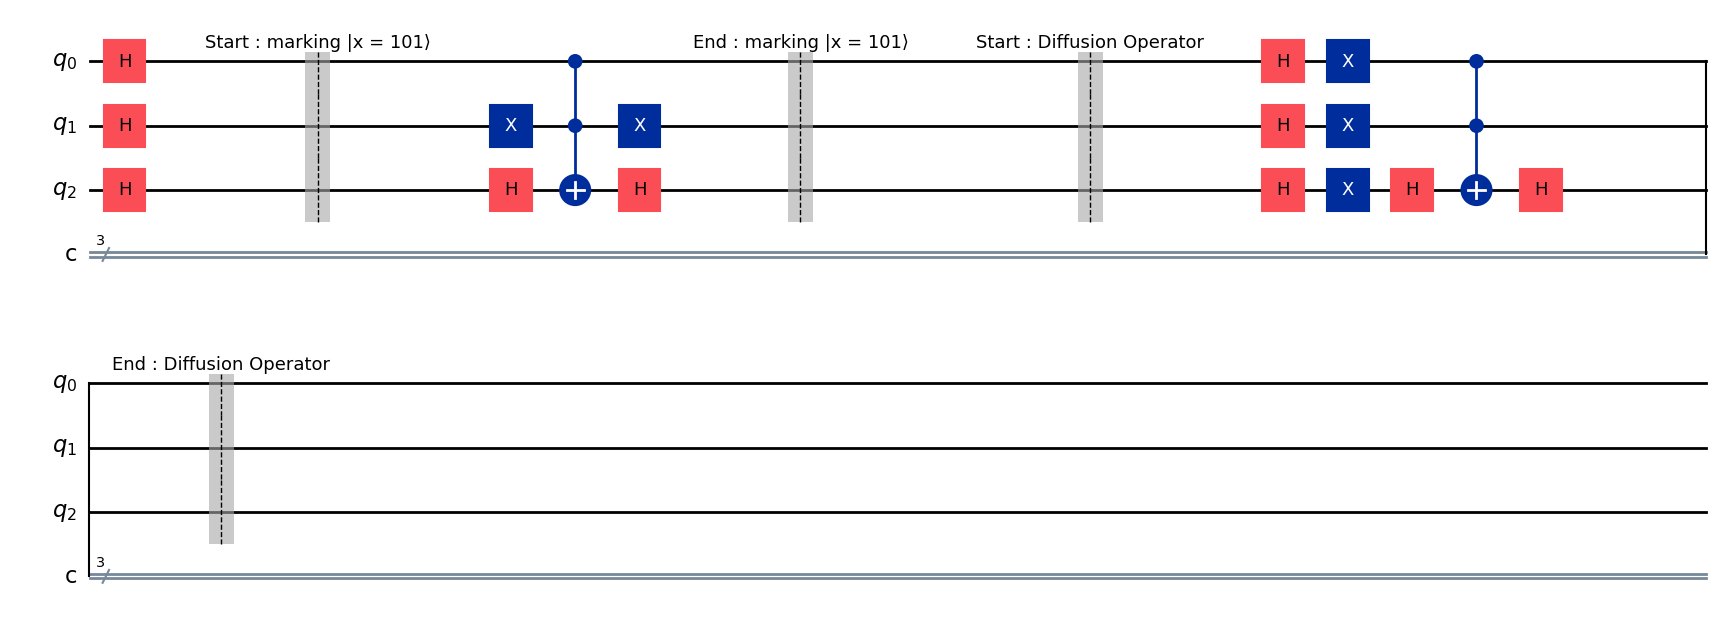

In [185]:
qc.barrier(label="Start : Diffusion Operator")
qc.h(range(3))

# Apply X to all qubits
qc.x(range(3))

# Apply the multi-controlled Z gate equivalent
qc.h(2)
qc.ccx(0, 1, 2)  # Apply Toffoli gate
qc.h(2)
qc.barrier(label="End : Diffusion Operator")

qc.draw('mpl')


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


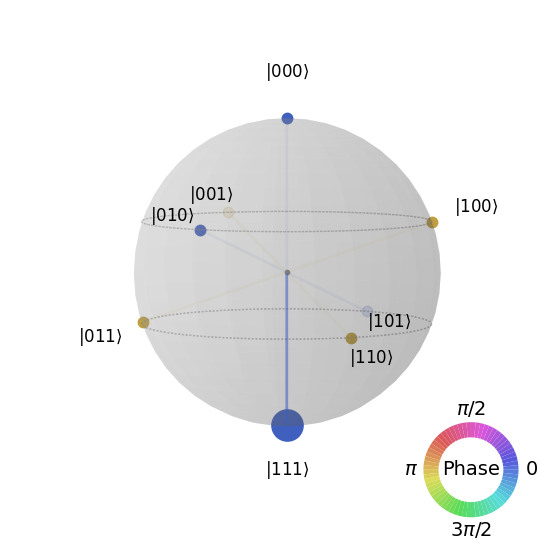


Resulting State Vector (on Bloch Sphere):


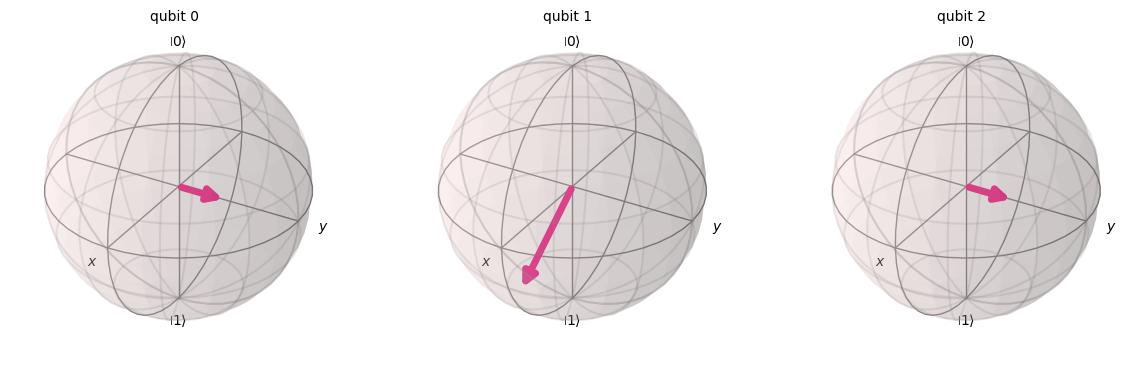

In [186]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

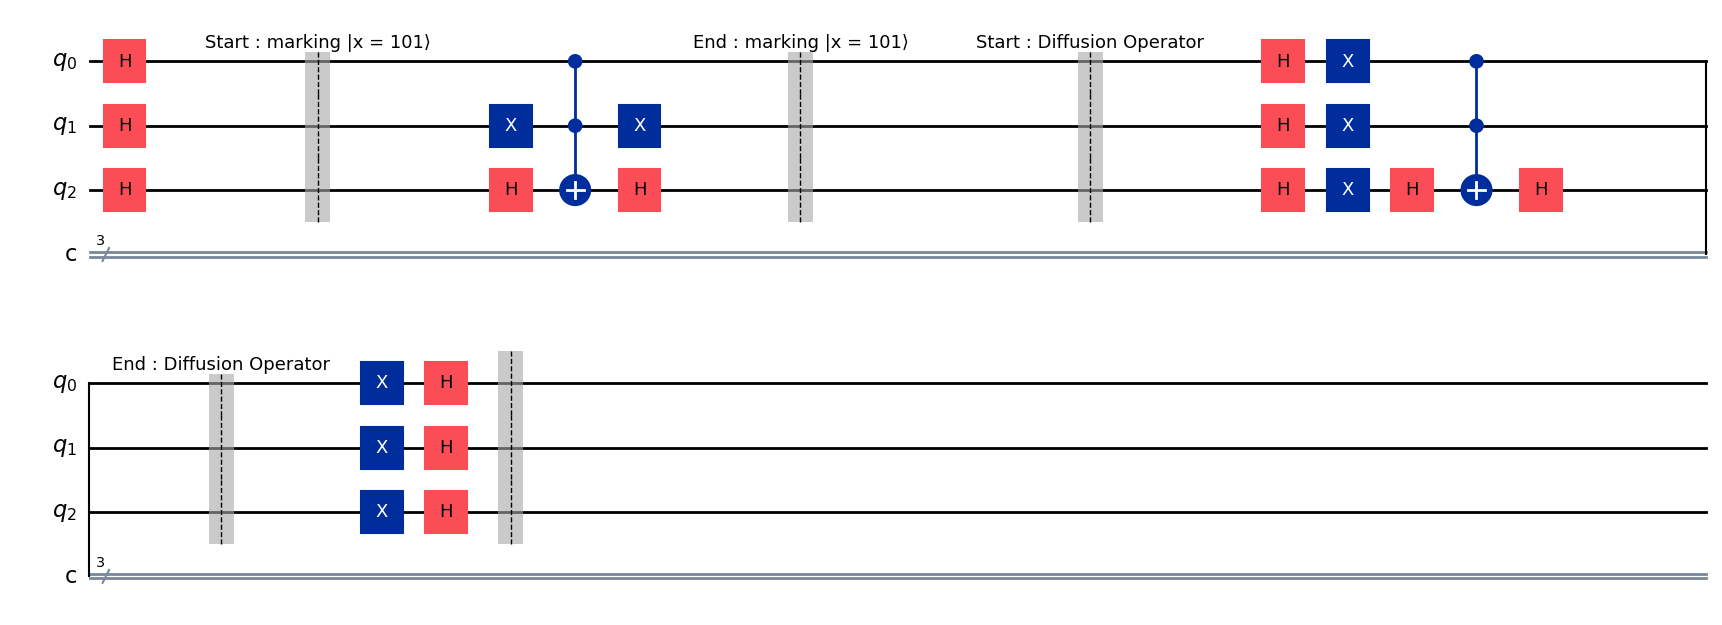

In [187]:
# Apply X to all qubits to revert back
qc.x(range(3))

# Apply Hadamard to all qubits to complete the diffusion
qc.h(range(3))
qc.barrier()
qc.draw('mpl')


Resulting State Vector (in LaTeX notation):


<IPython.core.display.Latex object>


Resulting State Vector (on Q-Sphere):    


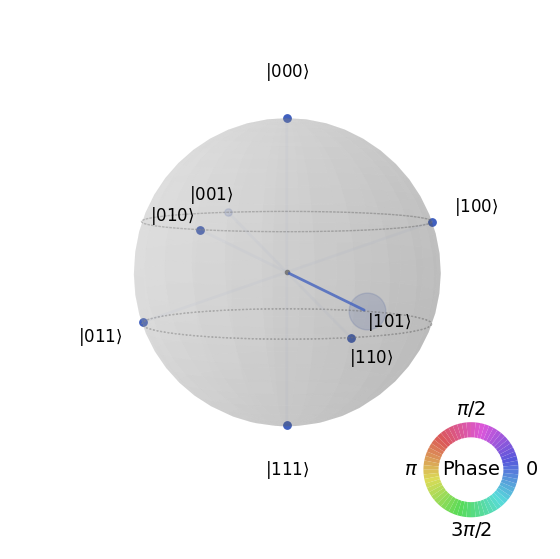


Resulting State Vector (on Bloch Sphere):


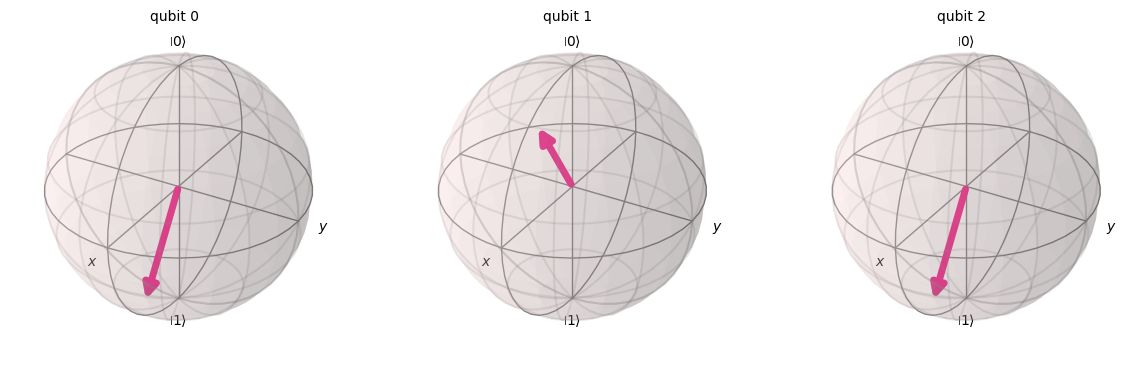

In [188]:
u_final = u_init.evolve(qc)
print("\n\033[1mResulting State Vector (in LaTeX notation):\033[0m".ljust(50))
display(u_final.draw('latex'))

print("\n\033[1mResulting State Vector (on Q-Sphere):\033[0m".ljust(50))
display(u_final.draw('qsphere'))

print("\n\033[1mResulting State Vector (on Bloch Sphere):\033[0m".ljust(50))
display(u_final.draw('bloch'))

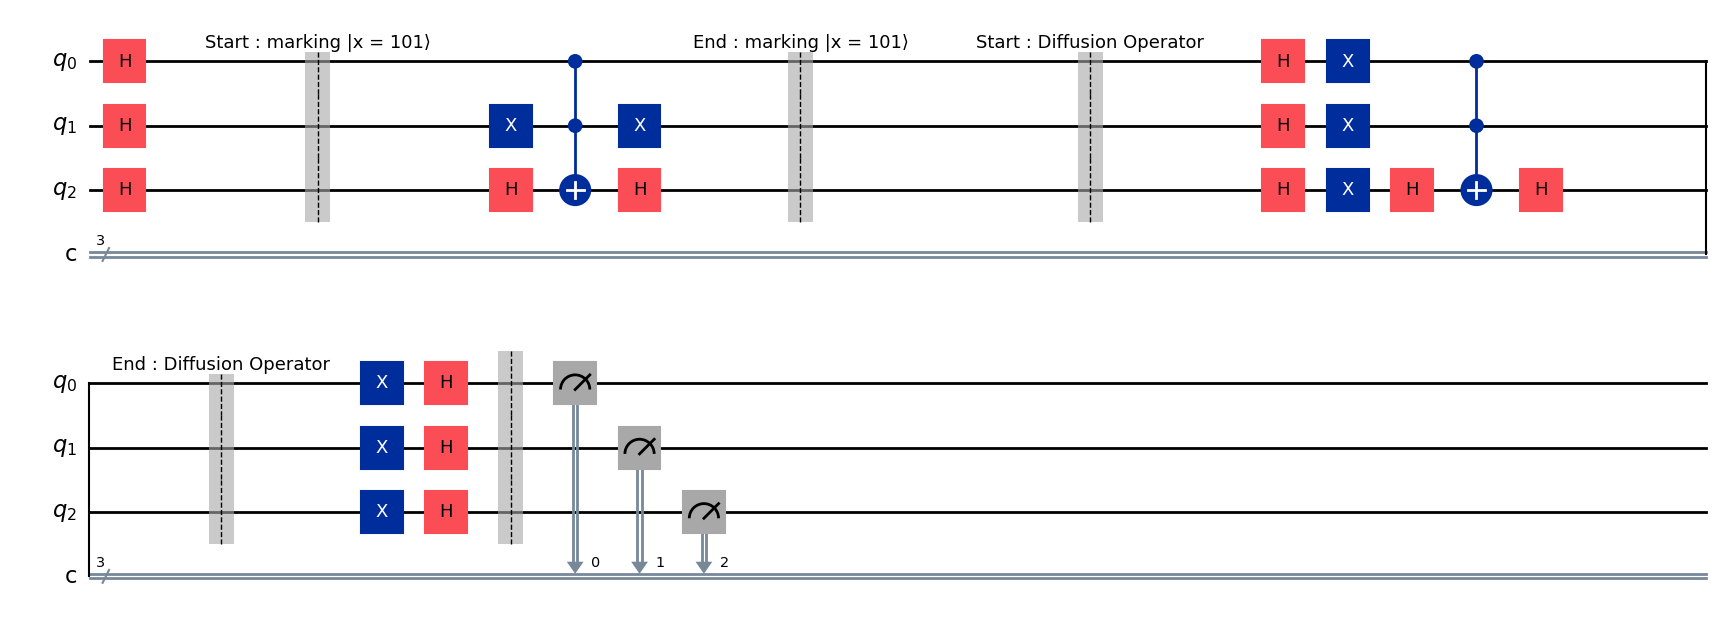

In [189]:

qc.measure(range(3), range(3))

qc.draw('mpl')


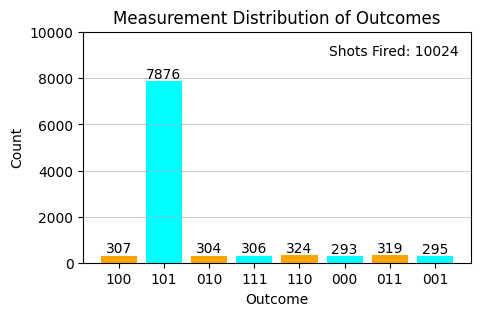

In [190]:
shots = 10024
result = AerSimulator().run(qc, shots=shots, memory=True).result()
counts = result.get_counts()

categories = list(counts.keys())
values = list(counts.values())

fig, axs = plt.subplots(1, 1, figsize=(5, 3))

bars0 = axs.bar(categories, values, color=['orange', 'cyan'])
axs.set_xlabel('Outcome')
axs.set_ylabel('Count')
axs.set_title('Measurement Distribution of Outcomes')
axs.grid(True,  axis='y', linestyle='-', linewidth=0.5, alpha=0.9)
axs.set_ylim(0, shots)
for bar in bars0:
    yval = bar.get_height()
    axs.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

custom_legend = [
    mpatches.Patch(color='none', label=f'Shots Fired: {shots}')
]
axs.legend(handles=custom_legend, frameon=False)